In [15]:
import pandas as pd
import numpy as np

In [16]:
raw_data = pd.read_csv("../data/house-prices-advanced-regression-techniques/train.csv")

In [17]:
raw_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [18]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [19]:
raw_data.MSSubClass.unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40], dtype=int64)

In [20]:
raw_data.MSSubClass.value_counts().sort_index()

20     536
30      69
40       4
45      12
50     144
60     299
70      60
75      16
80      58
85      20
90      52
120     87
160     63
180     10
190     30
Name: MSSubClass, dtype: int64

In [21]:
list(set(raw_data.dtypes.tolist()))

[dtype('O'), dtype('float64'), dtype('int64')]

In [22]:
df_num = raw_data.select_dtypes(include = ['float64', 'int64'])

In [23]:
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [24]:
print(sorted(df_num.YearBuilt.unique()))

[1872, 1875, 1880, 1882, 1885, 1890, 1892, 1893, 1898, 1900, 1904, 1905, 1906, 1908, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]


In [25]:
bins = [1870, 1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]
df_num['year_bin'] = pd.cut(df_num['YearBuilt'], bins, ordered=True)
print (df_num.year_bin.value_counts())

(2000, 2010]    364
(1960, 1970]    182
(1990, 2000]    175
(1970, 1980]    174
(1950, 1960]    164
(1940, 1950]     81
(1920, 1930]     76
(1910, 1920]     71
(1930, 1940]     63
(1980, 1990]     63
(1900, 1910]     22
(1890, 1900]     14
(1870, 1880]      6
(1880, 1890]      5
Name: year_bin, dtype: int64


<AxesSubplot: title={'center': 'Build years count'}>

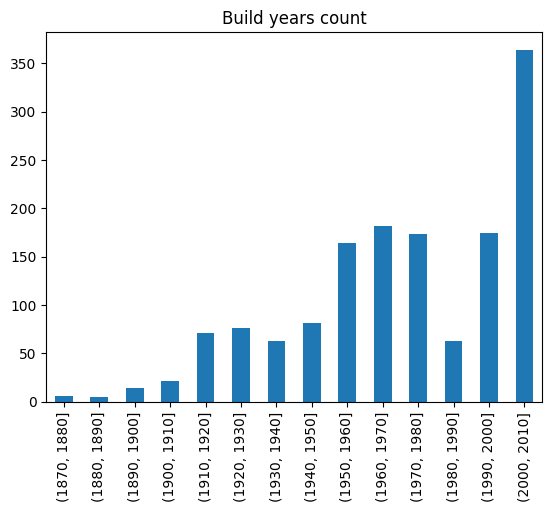

In [26]:
df_num.year_bin.value_counts(sort=False).plot(kind="bar", title= "Build years count")

In [27]:
import matplotlib.pyplot as plt

In [39]:
df_num.year_bin.value_counts(sort=False)

(1870, 1880]      6
(1880, 1890]      5
(1890, 1900]     14
(1900, 1910]     22
(1910, 1920]     71
(1920, 1930]     76
(1930, 1940]     63
(1940, 1950]     81
(1950, 1960]    164
(1960, 1970]    182
(1970, 1980]    174
(1980, 1990]     63
(1990, 2000]    175
(2000, 2010]    364
Name: year_bin, dtype: int64

In [31]:
df_num.year_bin

0       (2000, 2010]
1       (1970, 1980]
2       (2000, 2010]
3       (1910, 1920]
4       (1990, 2000]
            ...     
1455    (1990, 2000]
1456    (1970, 1980]
1457    (1940, 1950]
1458    (1940, 1950]
1459    (1960, 1970]
Name: year_bin, Length: 1460, dtype: category
Categories (14, interval[int64, right]): [(1870, 1880] < (1880, 1890] < (1890, 1900] < (1900, 1910] ... (1970, 1980] < (1980, 1990] < (1990, 2000] < (2000, 2010]]

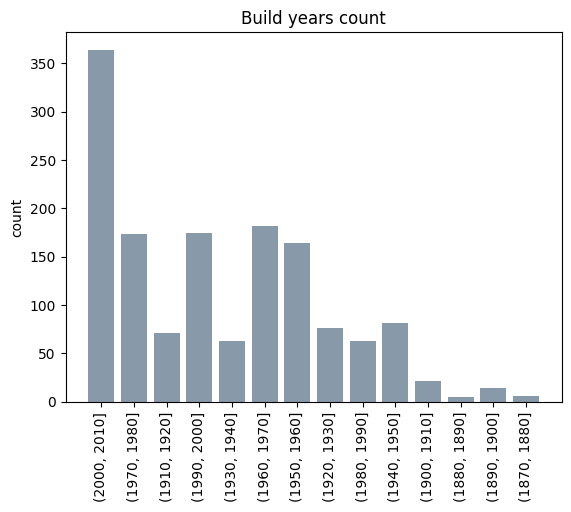

In [50]:
data = df_num.year_bin.astype(str).value_counts(sort=False)
plt.bar(data.index, data.values, align='center', alpha=0.5, color='#123456')
plt.xticks(data.index, rotation='vertical')
plt.ylabel('count')
plt.title('Build years count')

plt.show()

In [57]:
import seaborn as sns
datas = df_num.year_bin.astype(str).value_counts(sort=False)
print(datas.values)
print(datas.index)

[364 174  71 175  63 182 164  76  63  81  22   5  14   6]
Index(['(2000, 2010]', '(1970, 1980]', '(1910, 1920]', '(1990, 2000]',
       '(1930, 1940]', '(1960, 1970]', '(1950, 1960]', '(1920, 1930]',
       '(1980, 1990]', '(1940, 1950]', '(1900, 1910]', '(1880, 1890]',
       '(1890, 1900]', '(1870, 1880]'],
      dtype='object')


<AxesSubplot: ylabel='year_bin'>

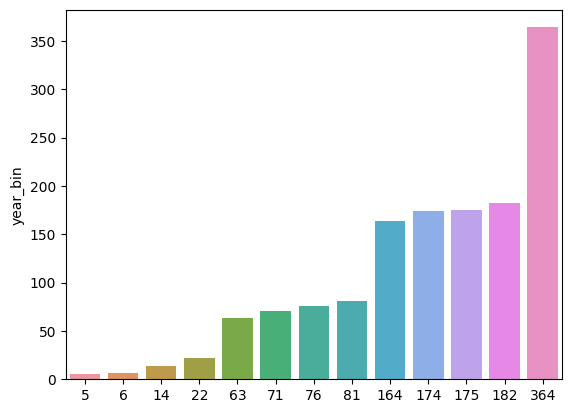

In [56]:
sns.barplot(x = datas.values, y=datas.index, data=datas)